### Scipy:

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:
1. fitting it to the periodic function
2. plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Expected Output:

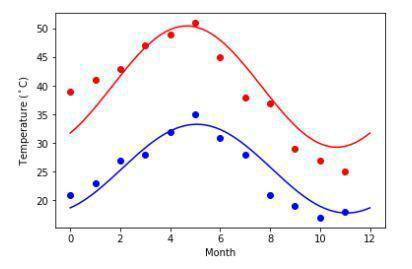

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
# Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
# From the given dataset form the dataframe

df = pd.DataFrame({'Max':[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
                   'Min':[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})

Text(0, 0.5, 'Temperature(°C)')

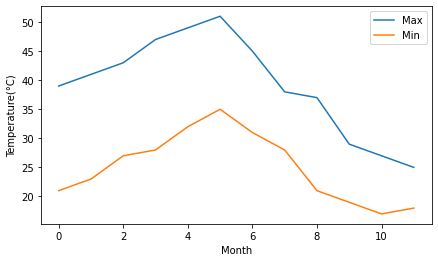

In [4]:
ax = df.plot(figsize=(7,4), kind='line')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature(°C)')

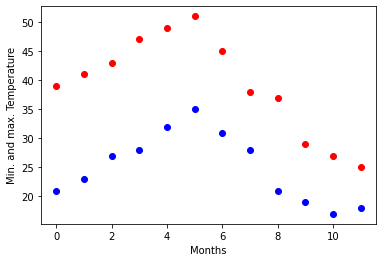

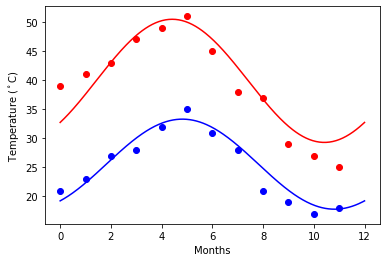

In [5]:
max_temp = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min_temp = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

np_max = np.array(max_temp)
np_min = np.array(min_temp)
months_in_year = np.arange(12)

plt.plot(months_in_year,np_max,'ro')
plt.plot(months_in_year,np_min, 'bo')
plt.xlabel("Months")
plt.ylabel("Min. and max. Temperature")

from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.sin((times + time_offset) * 2 * np.pi /times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months_in_year,np_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months_in_year,np_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)
plt.figure()

plt.plot(months_in_year, np_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months_in_year, np_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Months')
plt.show()

Matplotlib:

This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [8]:
# load the dataset
titanic = pd.read_csv(url)

In [9]:
# get top 5 rows
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
# get the unique value of the sex
titanic.sex.unique()

array(['female', 'male', nan], dtype=object)

### Total of three unique values of sex

In [11]:
# get the rows and columns informations of the dataset
titanic.shape

(1310, 14)

### Row = 1310 and column = 14

In [12]:
# get the index of the nan from sex column
titanic.sex[titanic.sex.isnull() == True]

1309    NaN
Name: sex, dtype: object

In [13]:
# get the glimps of the last rows.Its clear that row index = 1309 doesn't have any entry. It could be possible may be it's a new born
# child or it's a wrong entry
titanic[1307:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.875,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# delete the last entry from the data frame. It has no significance importance
titanic.dropna(how='all', inplace=True)

In [15]:
# after droping get the unique value of the sex
titanic.sex.unique()

array(['female', 'male'], dtype=object)

In [16]:
# get the value count of male and female
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

### 1. Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x24b96daaef0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'female'),
  Text(0.48083667958064136, -0.9893412391939719, 'male')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

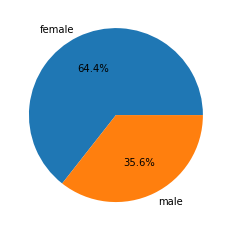

In [18]:
plt.pie(titanic.sex.value_counts(), labels=titanic.sex.unique(), autopct='%1.1f%%')

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

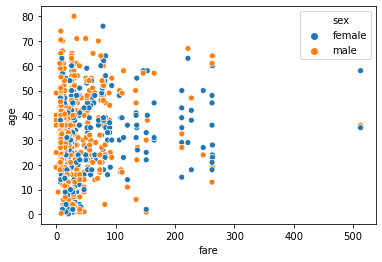

In [19]:
sns.scatterplot(x='fare',y='age',hue='sex',data=titanic)